# Continuous Probability Distribution

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm, binom, poisson, zscore
import scipy.special
import numpy as np
import janitor
import matplotlib.pyplot as plt
import string

In [2]:
pd.set_option("display.max_columns", 100)

### Cardiovascular disease

#### 5.1

In [3]:
p = norm.cdf(0.5, 0, 1)
p

0.6914624612740131

#### 5.2

In [4]:
1-p

0.3085375387259869

#### 5.3

In [5]:
norm.cdf(1.5, 0, 1)-norm.cdf(-1, 0, 1)

0.7745375447996848

#### 5.4

In [6]:
1-norm.cdf(2, 0, 1)

0.02275013194817921

#### 5.5

In [7]:
norm.cdf(2, 0, 1)-norm.cdf(1.5, 0, 1)

0.04405706932067888

## Nutrition

In [8]:
u = 124
sd = 20

#### 5.6

In [9]:
1-norm.cdf(140, u, sd)

0.21185539858339664

#### 5.7

In [10]:
norm.cdf(90, u, sd)

0.04456546275854304

#### 5.8

In [11]:
u2 = 121
sd2 = 19

In [12]:
1-norm.cdf(140, u2, sd2)

0.15865525393145707

#### 5.9

In [13]:
norm.cdf(90, u2, sd2)

0.05138410809515811

## Hypertension

#### 5.10

In [14]:
u = 0.189
sd = 2.428

In [15]:
pLessNeg2 = norm.cdf(-2, u, sd)
pMorePos2 = 1-norm.cdf(2, u, sd)
p = pLessNeg2 + pMorePos2
p

0.4115135114294158

#### 5.11

In [16]:
norm.ppf([.1, .9], u, sd)

array([-2.9226072,  3.3006072])

## Cardiovascular Disease, Pulmonary Disease

#### 5.12

In [17]:
1 - norm.cdf(20, 12.8, 5.1)

0.0790096269236995

#### 5.13

In [18]:
1 - norm.cdf(20, 9.3, 3.2)

0.0004132709230214582

## Cardiovascular Disease

#### 5.14

In [19]:
norm.cdf(200, 219, 50)

0.3519727075758372

#### 5.15

In [20]:
1-norm.cdf(250, 219, 50)

0.267628893468983

#### 5.16

In [21]:
norm.cdf(250, 219, 50)-norm.cdf(200, 219, 50)

0.3803983989551798

## Hypertension

#### 5.17

In [22]:
pChild = 1-norm.cdf(115, 105, 5)
pChild

0.02275013194817921

#### 5.18

In [23]:
pAdult = 1-norm.cdf(140, 125, 10)
pAdult

0.06680720126885809

#### 5.19

In [24]:
pAtLeast1Child = 1-binom.pmf(0,2,pChild)
pAtLeast1Adult = 1-binom.pmf(0,2,pAdult)
pFamily = pAtLeast1Adult*pAtLeast1Child
pFamily

0.005809569107029897

#### 5.20 [check]

In [25]:
binom.cdf(5, 1000, pFamily) - binom.cdf(0, 1000, pFamily)

0.4733926654981887

## Pulmonary disease

In [26]:
m_ns, s_ns = (4, .5)
m_s, s_s = (3.5, .6)

#### 5.21

In [27]:
norm.cdf(2.5, m_s, s_s)

0.0477903522728147

#### 5.22

In [28]:
dec_mean_per_year = 0.03
dec_std_per_year = 0.02
years = (75-45)
norm.cdf(2.5, 4-years*dec_mean_per_year, years*dec_std_per_year)

0.15865525393145702

#### 5.23

In [29]:
years = (75-25)
norm.cdf(2.5, 4-years*dec_mean_per_year, years*dec_std_per_year)

0.5

## Infectious Disease [check]

In [30]:
pEos = 1.5/100
pLym = 34/100
pNeu = 60/100
n = 100

#### 5.25

In [31]:
1-binom.cdf(4, n, pEos)

0.017693233520242102

#### 5.26

In [32]:
1-binom.cdf(40-1, n, pLym)

0.12347640098901147

#### 5.27

In [33]:
1-binom.cdf(50-1, n, pLym)

0.000700946032453853

#### 5.28

In [34]:
binom.ppf(0.95, n, pLym)

42.0

Observing 43 or more will suggest abnormalities

#### 5.29

In [35]:
binom.ppf(0.95, n, pNeu)

68.0

Observing 69 or more will suggest abnormalities at 5% level

#### 5.30

In [36]:
binom.ppf(0.99, n, pNeu)

71.0

Observing 72 or more will suggest abnormalities at 1% level

## Blood chemistry

In [37]:
m_glu = 90
s_glu = 38

#### 5.31

In [38]:
norm.cdf(120, m_glu, s_glu) - norm.cdf(65, m_glu, s_glu)

0.5297795112580386

#### 5.32

In [39]:
1-norm.cdf(120*1.5, m_glu, s_glu)

0.008932096256072164

#### 5.33

In [40]:
1-norm.cdf(120*2, m_glu, s_glu)

3.950745888781082e-05

#### 5.34

In [41]:
pAtLeast180 = 1-norm.cdf(180, m_glu, s_glu)
pAtLeast180**2

7.978234352773836e-05

#### 5.35

In [42]:
n = 6000
obs = 75

In [43]:
# exact binomial
pLessObs = binom.cdf(obs-1, n, pAtLeast180)
pObsOrMore = 1-pLessObs
pObsOrMore

0.003166497691493464

In [44]:
# poisson approx
ll = n*pAtLeast180
1-poisson.cdf(obs-1, ll)

0.00329664962292342

## Cancer

In [45]:
vitE = (0.8, 0.48)
placebo = (0.05, 0.16)

#### 5.36

In [46]:
1-norm.cdf(0.3, *vitE)

0.851216875818248

#### 5.37

sensitivity

#### 5.38

In [47]:
norm.cdf(0.3, *placebo)

0.9409148770673325

#### 5.39

specificity

#### 5.40

In [48]:
def sens_spec(thr):
    return 1-norm.cdf(thr, *vitE), norm.cdf(thr, *placebo)

In [49]:
def diff(thr):
    ss = sens_spec(thr)
    return abs(ss[0]-ss[1])

In [50]:
from scipy.optimize import minimize

In [51]:
x_min = minimize(diff, 0.3)

In [52]:
x_min.x

array([0.2375])

In [53]:
sensE, specE = sens_spec(x_min.x)
sensE, specE

(array([0.87937638]), array([0.87937637]))

#### 5.41

In [54]:
sens, spec = sens_spec(np.linspace(0,1,100))
sensE, specE = sens_spec(x_min.x)

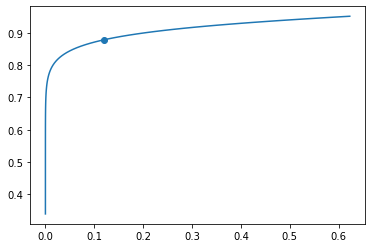

In [55]:
plt.plot(1-spec, sens)
plt.scatter(1-specE, sensE)
# plt.axis([-0.01, 1,-0.01,1])

In [56]:
x = 1-spec
x_idx = np.argsort(x)
x = x[x_idx]
y = sens[x_idx]

y[0]=0
x = np.append(x, 1)
y = np.append(y, 1)

In [57]:
scipy.integrate.simps(y=y, x=x)

0.9325985482035628

## Pulmonary Disease

In [58]:
fev_df = pd.read_csv('data/FEV.DAT.txt').clean_names().set_index('id')
fev_df

,age,fev,hgt,sex,smoke
id,,,,,
301,9,1.708,57.0,0,0
451,8,1.724,67.5,0,0
501,7,1.720,54.5,0,0
642,9,1.558,53.0,1,0
901,9,1.895,57.0,1,0
...,...,...,...,...,...
73041,16,4.270,67.0,1,1
73042,15,3.727,68.0,1,1
73751,18,2.853,60.0,0,0


#### 5.42

In [59]:
fev_df['zscore_smoke_status'] = fev_df.groupby('smoke').fev.transform(zscore)

In [60]:
fev_df.smoke.value_counts()

0    589
1     65
Name: smoke, dtype: int64

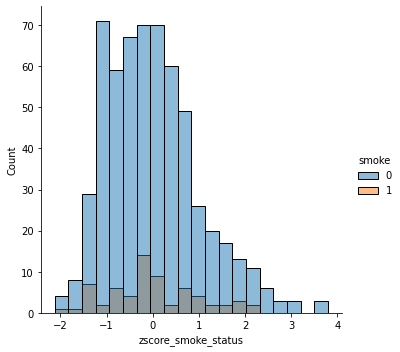

In [61]:
sns.displot(data=fev_df, x='zscore_smoke_status', hue='smoke', stat='count')

#### 5.43

In [62]:
fev_df_age_10 = fev_df[fev_df.age>10].copy()
fev_df_age_10['zscore_smoke'] = fev_df_age_10.groupby('smoke').fev.transform(zscore)

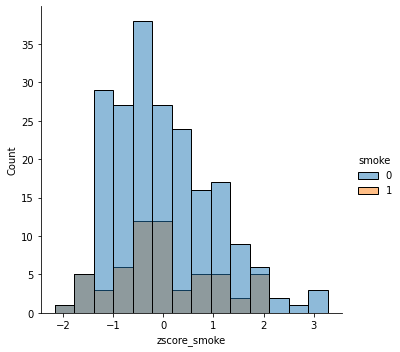

In [63]:
sns.displot(data=fev_df_age_10, x='zscore_smoke', hue='smoke', stat='count')

#### 5.44

In [64]:
fev_df['zscore_smoke_sex'] = fev_df.groupby(['smoke', 'sex']).fev.transform(zscore)

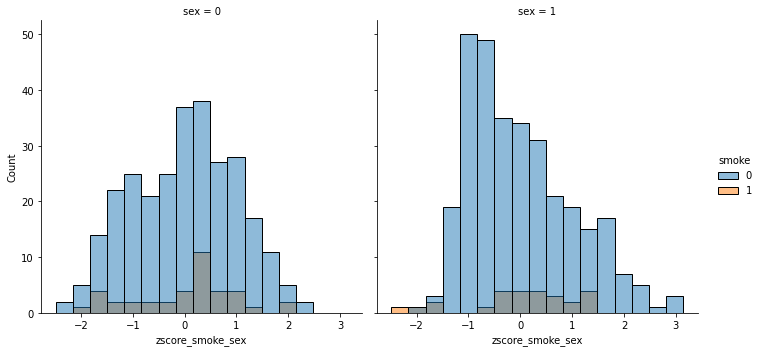

In [65]:
sns.displot(data=fev_df, x='zscore_smoke_sex', hue='smoke', stat='count', col='sex')

## Cardiovascular Disease

In [66]:
nifed_df = pd.read_csv('data/NIFED.DAT.txt', na_values=999).clean_names().set_index('id')
nifed_df.trtgrp = nifed_df.trtgrp.str.strip("'")
nifed_df["id"] = nifed_df.index
nifed_df

,trtgrp,bashrtrt,lv1hrtrt,lv2hrtrt,lv3hrtrt,bassys,lv1sys,lv2sys,lv3sys,id
id,,,,,,,,,,
1,P,60,70,64.0,NaN,128.0,110.0,120.0,NaN,1
2,N,52,64,98.0,NaN,180.0,156.0,160.0,140.0,2
3,P,100,94,NaN,NaN,190.0,140.0,NaN,NaN,3
4,N,84,88,96.0,112.0,136.0,126.0,122.0,110.0,4
5,P,56,70,61.0,64.0,230.0,150.0,130.0,150.0,5
6,P,105,120,NaN,NaN,142.0,150.0,NaN,NaN,6
7,N,116,116,NaN,NaN,210.0,230.0,NaN,NaN,7
8,N,68,68,72.0,84.0,170.0,150.0,150.0,156.0,8
9,P,85,88,90.0,92.0,150.0,134.0,140.0,154.0,9


#### 5.45

In [67]:
nifed_df['lv1hrtrt_change'] = nifed_df.lv1hrtrt-nifed_df.bashrtrt
nifed_df['lv2hrtrt_change'] = nifed_df.lv2hrtrt-nifed_df.bashrtrt
nifed_df['lv3hrtrt_change'] = nifed_df.lv2hrtrt-nifed_df.bashrtrt

nifed_df['lv1sys_change'] = nifed_df.lv1sys-nifed_df.bassys
nifed_df['lv2sys_change'] = nifed_df.lv2sys-nifed_df.bassys
nifed_df['lv3sys_change'] = nifed_df.lv3sys-nifed_df.bassys

<AxesSubplot:xlabel='lv1hrtrt_change', ylabel='Count'>

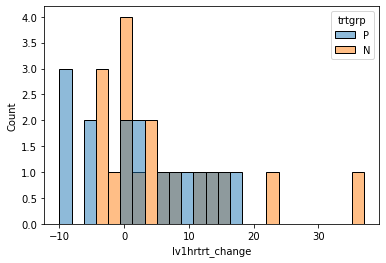

In [68]:
sns.histplot(data=nifed_df, x='lv1hrtrt_change', hue='trtgrp', bins=25)

<AxesSubplot:xlabel='lv2hrtrt_change', ylabel='Count'>

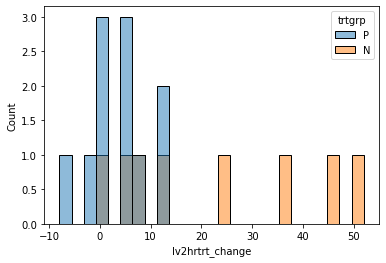

In [69]:
sns.histplot(data=nifed_df, x='lv2hrtrt_change', hue='trtgrp', bins=25)

<AxesSubplot:xlabel='lv3hrtrt_change', ylabel='Count'>

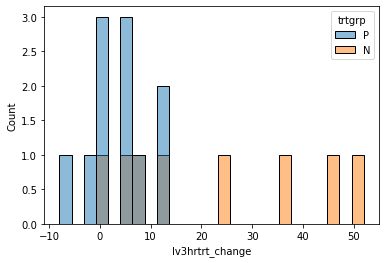

In [70]:
sns.histplot(data=nifed_df, x='lv3hrtrt_change', hue='trtgrp', bins=25)

<AxesSubplot:xlabel='lv1sys_change', ylabel='Count'>

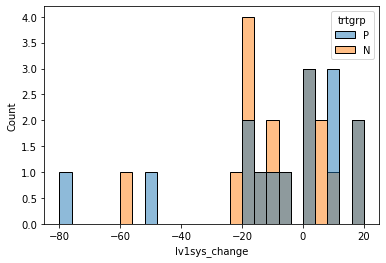

In [71]:
sns.histplot(data=nifed_df, x='lv1sys_change', hue='trtgrp', bins=25)

<AxesSubplot:xlabel='lv2sys_change', ylabel='Count'>

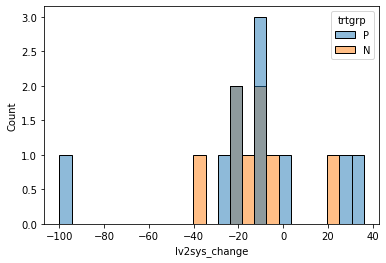

In [72]:
sns.histplot(data=nifed_df, x='lv2sys_change', hue='trtgrp', bins=25)

<AxesSubplot:xlabel='lv3sys_change', ylabel='Count'>

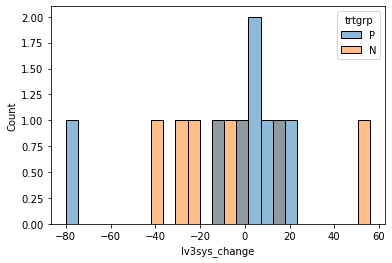

In [73]:
sns.histplot(data=nifed_df, x='lv3sys_change', hue='trtgrp', bins=25)

#### 5.46

In [74]:
nifed_df_long = pd.wide_to_long(nifed_df, 'lv', i='id', j='tmp', suffix=r'\d+.+').reset_index(level=1)
nifed_df_long['lvl'] = nifed_df_long.tmp.str[0].astype(int)
nifed_df_long['var'] = nifed_df_long.tmp.str[1:]
nifed_df_long.drop(columns=['tmp'])
nifed_df_long.head()

,tmp,trtgrp,bashrtrt,bassys,lv,lvl,var
id,,,,,,,
1,1hrtrt,P,60,128.0,70.0,1,hrtrt
2,1hrtrt,N,52,180.0,64.0,1,hrtrt
3,1hrtrt,P,100,190.0,94.0,1,hrtrt
4,1hrtrt,N,84,136.0,88.0,1,hrtrt
5,1hrtrt,P,56,230.0,70.0,1,hrtrt


C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


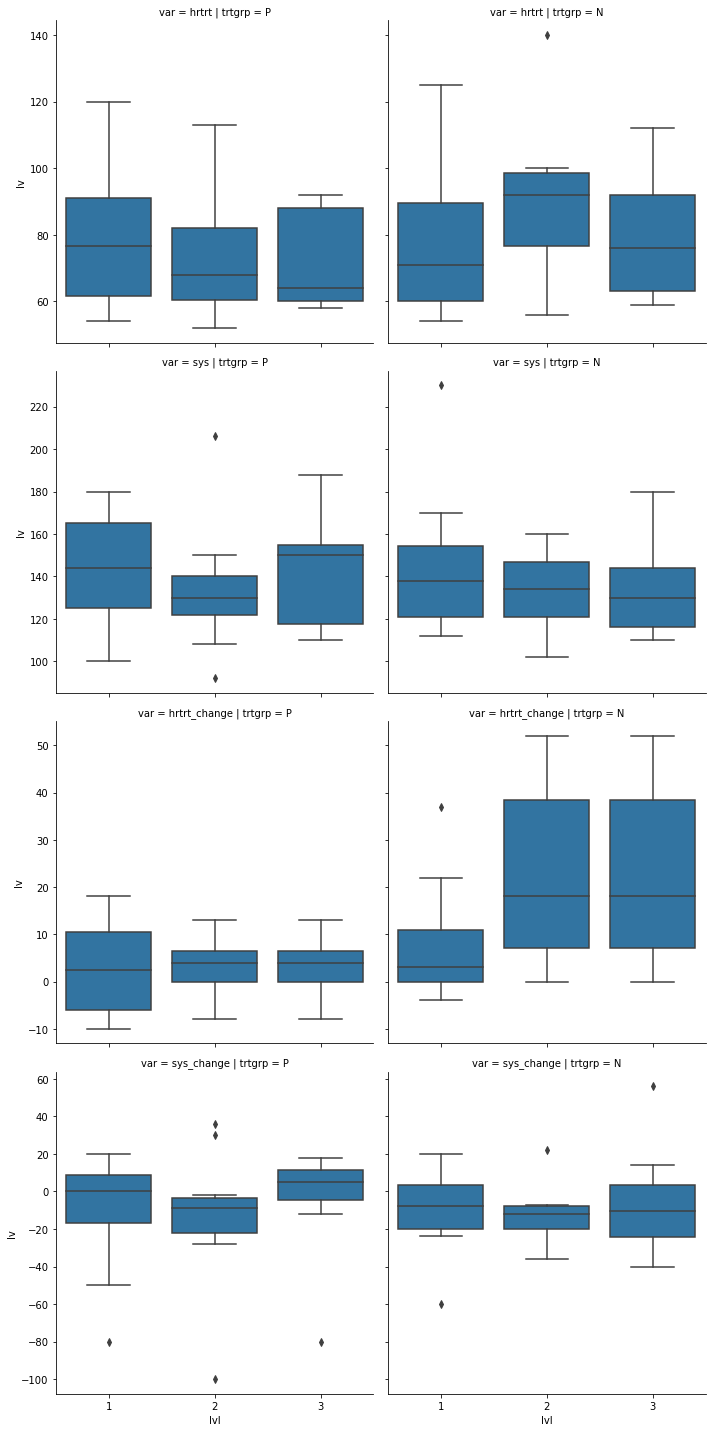

In [75]:
g = sns.FacetGrid(nifed_df_long, col='trtgrp', row='var', height=5, sharey="row")
g.map(sns.boxplot, 'lvl', 'lv')

# sns.boxplot(data=nifed_df_long, x='lvl', y='lv', hue='trtgrp')

## Hypertension

#### 5.47

In [76]:
meanAfrAmer = 230
stdAfrAmer = 203

In [77]:
pLess300AA = norm.cdf(300, meanAfrAmer, stdAfrAmer)
pLess300AA

0.6348880035873556

#### 5.48

In [78]:
meanCauc = 400
stdCauc = 218

In [79]:
pLess300C = norm.cdf(300, meanCauc, stdCauc)
pLess300C

0.32321920633071205

#### 5.49

In [80]:
pLess300AA*46, pLess300C*53

(29.20484816501836, 17.130617935527738)

## Hepatic Disease

#### 5.50

In [81]:
nAlco = 84
nHepatoma = 29
pHepaAlco = 0.24

In [82]:
binom.pmf(nHepatoma,nAlco,pHepaAlco)

0.008730478073513407

#### 5.51

In [83]:
1-binom.cdf(nHepatoma-1,nAlco,pHepaAlco)

0.01935101848856724

#### 5.52

In [84]:
# ????

## Diabetes, Obstetrics

In [85]:
post12ActiveMean = 0.2
post12ActiveStd = 15.4

#### 5.53

In [86]:
norm.cdf(0, post12ActiveMean, post12ActiveStd)

0.4948190770616754

#### 5.54

In [87]:
post12ControlMean = 7.9
post12ControlStd = 15.3

In [88]:
norm.cdf(0, post12ControlMean, post12ControlStd)

0.3028085274526222

#### 5.55

In [89]:
norm.ppf([0.1, 0.9], post12ActiveMean, post12ActiveStd)

array([-19.53589411,  19.93589411])

In [90]:
norm.ppf([0.1, 0.9], post12ControlMean, post12ControlStd)

array([-11.70773895,  27.50773895])

#### 5.56

In [91]:
pActive = 0.8
pControl = 1-pActive
post12TotalMean = pActive*post12ActiveMean + pControl*post12ControlMean
post12TotalStd = np.sqrt((pActive*post12ActiveStd)**2 + (pControl*post12ControlStd)**2)

In [92]:
post12TotalMean, post12TotalStd

(1.7399999999999998, 12.694329442707874)

In [93]:
n = 10000000
v1 = norm.rvs(post12ActiveMean, post12ActiveStd, n//5*4)
v2 = norm.rvs(post12ControlMean, post12ControlStd, n//5)
v = np.concatenate([v1, v2])
np.mean(v), np.std(v)

(1.7339662310234922, 15.686434470033705)

In [94]:
norm.cdf(2, post12TotalMean, post12TotalStd)

0.5081703993742372

#### 5.57

There is at least 50% so program should be implemented

## Environmental Health

#### 5.58

In [95]:
deaths_per_day = 3
deaths_per_day_poll = 3.2

### Nutrition

#### 5.59

In [96]:
nutri_df = pd.read_csv('data/VALID.DAT.txt').clean_names().set_index('id')
nutri_df

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
id,,,,,,,,
100396,33.20,21.2,81.15,53.8,8.26,1.68,1807,1242.2
100566,17.73,10.6,53.28,36.6,0.83,0.00,1418,907.0
107633,38.73,23.8,83.48,47.2,20.13,15.10,1889,786.0
107737,21.57,22.7,49.65,55.3,11.16,7.49,1426,1392.5
107744,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8
...,...,...,...,...,...,...,...,...
136378,36.19,18.1,95.43,47.1,4.60,7.25,1976,1204.3
136407,22.42,10.9,62.15,32.0,2.56,1.81,1731,981.6
136421,16.98,20.4,42.85,47.5,13.91,8.64,1033,1128.3


In [97]:
nutri_long_all = nutri_df.melt()
nutri_long_all[['nutri_type', 'q_type']] = nutri_long_all.variable.str.split('_', expand=True)
nutri_long = nutri_long_all[nutri_long_all.nutri_type != 'alco']

C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


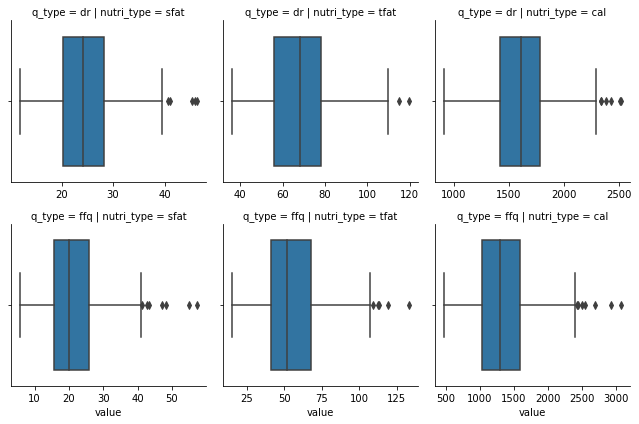

In [98]:
g = sns.FacetGrid(nutri_long, col='nutri_type', row='q_type', height=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'value')

In [99]:
def check_dist(df, nutri, quest, target_val, stds=None):
    print(f'Check {nutri} for {quest}')
    if stds is None:
        stds = [1.0, 1.5, 2.0, 2.5]
    data = df[(df.nutri_type == nutri) & (df.q_type == quest)][target_val].values
#     print(data)
    m = np.mean(data)
    v = np.std(data)
    for s in stds:
        minval = m - s*v
        maxval = m + s*v
        inrange = (minval <= data) & (data <= maxval)
        inrange_prop = sum(inrange)/len(data)
        ex = norm.cdf(s)-norm.cdf(-s)
        print(f'{s}, {inrange_prop:.3f} ex={ex:.3f} diff={inrange_prop-ex:.3f}')

In [100]:
for n in ['sfat', 'tfat', 'cal']:
    for q in ['dr', 'ffq']:
        check_dist(nutri_long, n, q, 'value')

Check sfat for dr
1.0, 0.694 ex=0.683 diff=0.011
1.5, 0.879 ex=0.866 diff=0.012
2.0, 0.942 ex=0.954 diff=-0.012
2.5, 0.983 ex=0.988 diff=-0.005
Check sfat for ffq
1.0, 0.728 ex=0.683 diff=0.046
1.5, 0.873 ex=0.866 diff=0.006
2.0, 0.948 ex=0.954 diff=-0.007
2.5, 0.977 ex=0.988 diff=-0.011
Check tfat for dr
1.0, 0.705 ex=0.683 diff=0.023
1.5, 0.861 ex=0.866 diff=-0.005
2.0, 0.960 ex=0.954 diff=0.005
2.5, 0.983 ex=0.988 diff=-0.005
Check tfat for ffq
1.0, 0.734 ex=0.683 diff=0.051
1.5, 0.867 ex=0.866 diff=0.001
2.0, 0.948 ex=0.954 diff=-0.007
2.5, 0.977 ex=0.988 diff=-0.011
Check cal for dr
1.0, 0.699 ex=0.683 diff=0.017
1.5, 0.861 ex=0.866 diff=-0.005
2.0, 0.936 ex=0.954 diff=-0.018
2.5, 0.988 ex=0.988 diff=0.001
Check cal for ffq
1.0, 0.705 ex=0.683 diff=0.023
1.5, 0.884 ex=0.866 diff=0.018
2.0, 0.954 ex=0.954 diff=-0.001
2.5, 0.983 ex=0.988 diff=-0.005


#### 5.60

In [101]:
nutri_long['value_log'] = np.log(nutri_long.value)

<ipython-input-101-6e0f5ccb69ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutri_long['value_log'] = np.log(nutri_long.value)


C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


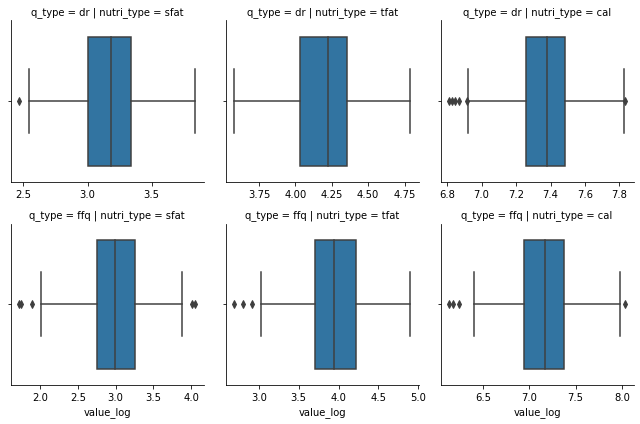

In [102]:
g = sns.FacetGrid(nutri_long, col='nutri_type', row='q_type', height=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'value_log')

In [103]:
for n in ['sfat', 'tfat', 'cal']:
    for q in ['dr', 'ffq']:
        check_dist(nutri_long, n, q, 'value_log')

Check sfat for dr
1.0, 0.688 ex=0.683 diff=0.005
1.5, 0.838 ex=0.866 diff=-0.028
2.0, 0.965 ex=0.954 diff=0.011
2.5, 0.994 ex=0.988 diff=0.007
Check sfat for ffq
1.0, 0.717 ex=0.683 diff=0.034
1.5, 0.879 ex=0.866 diff=0.012
2.0, 0.948 ex=0.954 diff=-0.007
2.5, 0.977 ex=0.988 diff=-0.011
Check tfat for dr
1.0, 0.694 ex=0.683 diff=0.011
1.5, 0.850 ex=0.866 diff=-0.017
2.0, 0.942 ex=0.954 diff=-0.012
2.5, 0.994 ex=0.988 diff=0.007
Check tfat for ffq
1.0, 0.711 ex=0.683 diff=0.028
1.5, 0.890 ex=0.866 diff=0.024
2.0, 0.954 ex=0.954 diff=-0.001
2.5, 0.983 ex=0.988 diff=-0.005
Check cal for dr
1.0, 0.699 ex=0.683 diff=0.017
1.5, 0.861 ex=0.866 diff=-0.005
2.0, 0.936 ex=0.954 diff=-0.018
2.5, 0.983 ex=0.988 diff=-0.005
Check cal for ffq
1.0, 0.676 ex=0.683 diff=-0.006
1.5, 0.861 ex=0.866 diff=-0.005
2.0, 0.960 ex=0.954 diff=0.005
2.5, 0.977 ex=0.988 diff=-0.011


#### 5.61

In [104]:
nutri_long_alco = nutri_long_all[nutri_long_all.nutri_type == 'alco']

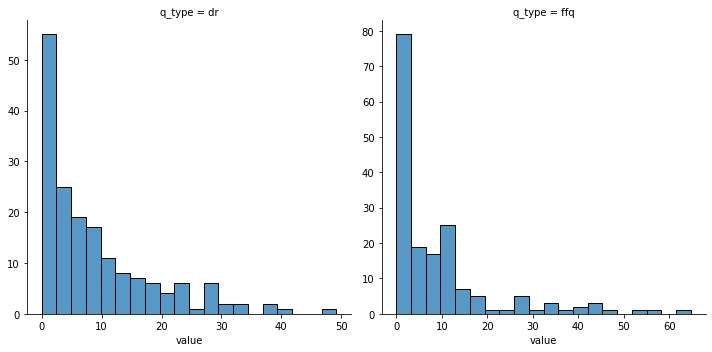

In [105]:
g = sns.FacetGrid(nutri_long_alco, col='q_type', height=5, sharex=False, sharey=False)
g.map(sns.histplot, 'value', bins=20)

### Cancer, Neurology

#### 5.62

Poisson, with lambda=45.6 or its approximation.

#### 5.63

In [106]:
mean = 45.6
std = np.sqrt(mean)

In [107]:
obs = 37
probs = norm.cdf([obs-.5, obs+.5], mean, std)
probs[1]-probs[0]

0.026270984305312273

#### 5.64

In [108]:
poisson.pmf(13, 2)

1.7804126176587247e-07

## Hypertension

#### 5.65

In [109]:
mean_drug = 5
sd_drug = 33

In [110]:
1-norm.cdf(5, mean_drug, sd_drug)

0.5

#### 5.66

In [111]:
mean_untreated = 2
sd_untreated = 33

In [112]:
1-norm.cdf(5, mean_untreated, sd_untreated)

0.46378241330310566

#### 5.67

In [113]:
def ratio_by_rep(n):
    p_drug = 1-norm.cdf(5, mean_drug, 33/n)
    p_untreated = 1-norm.cdf(5, mean_untreated, 33/n)
    return p_drug/p_untreated, p_drug, p_untreated

In [114]:
ratio_by_rep(1)

(1.0780917638488037, 0.5, 0.46378241330310566)

In [115]:
n = 1
while ratio_by_rep(n)[0] < 5:
    n += 1
n

15

In [116]:
ratio_by_rep(n)

(5.790990144568838, 0.5, 0.08634102070937422)

She should take 15 measurements

## Endocrinology

In [117]:
placeboMean = -1.8
placeboStd = 4.3

#### 5.68

In [118]:
pPlacebo = norm.cdf(-2, placeboMean, placeboStd)
pPlacebo

0.4814512331939527

#### 5.69

In [119]:
drugMean = 3.5
drugStd = 4.2

In [120]:
pDrug = norm.cdf(-2, drugMean, drugStd)
pDrug

0.09517848899674292

#### 5.70

In [121]:
pNoCompliers = 0.1
(1-pNoCompliers)*pDrug + pNoCompliers*pPlacebo

0.13380576341646389

## Cardiovascular Disease

In [122]:
weight18Mean = 123
weight50Mean = 142
sbp50Mean = 125
sbp50Std = 15

#### 5.71

In [123]:
1-norm.cdf(140, sbp50Mean, sbp50Std)

0.15865525393145707

#### 5.72

In [124]:
sbp18Mean = sbp50Mean - (weight50Mean-weight18Mean)/10*3
sbp18Mean

119.3

#### 5.73

In [125]:
sbp18Std = sbp50Std
1-norm.cdf(140, sbp18Mean, sbp18Std)

0.08379332241501425

#### 5.74

In [126]:
1-0.08379332241501425/0.15865525393145707

0.471852836016291

## Simulation

#### 5.75

In [127]:
def plot_binom_approx(n, p, size=100):
    samplesBin = binom.rvs(n, p, size=size)
    samplesNorm = norm.rvs(n*p, np.sqrt(n*p*(1-p)), size=size)
    print(n*p*(1-p))
    sns.histplot(samplesBin, bins=11, discrete=True, kde=True)
    sns.histplot(samplesNorm, discrete=True, kde=True, color='red')    

2.4


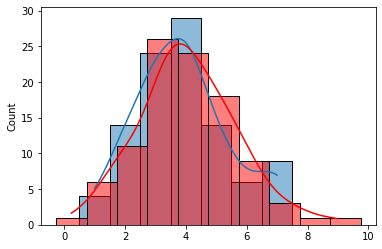

In [128]:
plot_binom_approx(10, .4)

#### 5.76

4.8


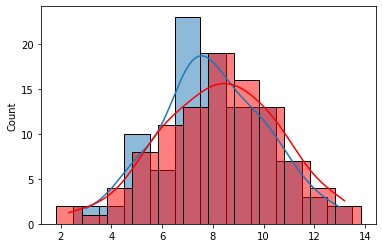

In [129]:
plot_binom_approx(20, .4)

#### 5.77

12.0


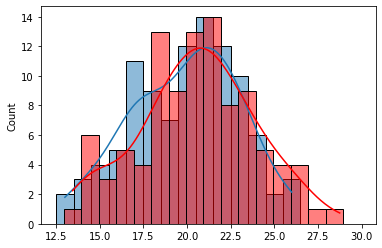

In [130]:
plot_binom_approx(50, .4)

## Simulation

#### 5.78

Binomial distribution with p=0.5, 15 trials

#### 5.79

Normal distribution with mean 7.5 and variance 3.75

#### 5.80

In [131]:
np.unique(binom.rvs(15, 0.5, size=10000))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

<AxesSubplot:ylabel='Count'>

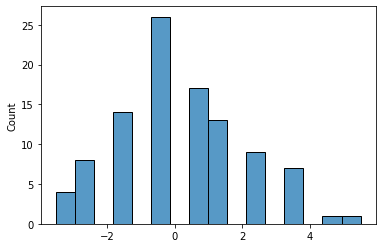

In [132]:
sns.histplot(binom.rvs(15, 0.5, size=100)-7.5, bins=16)

## Orthopedics

In [133]:
df = pd.read_csv('data/PIRIFORM.DAT.txt').clean_names().set_index('id')
df['status'] = df.piriform.map({1: 'No PS', 2: 'PS'})
df['fair_status'] = df.maxchg >= 1.86
df.sample(10)

,piriform,sex,age,maxchg,status,fair_status
id,,,,,,
3024.0,2,2,54,4.62,PS,True
670.0,2,2,53,2.71,PS,True
3428.0,2,1,43,3.12,PS,True
252.5,2,2,32,1.88,PS,True
4027.0,2,2,71,1.88,PS,True
926.0,2,2,42,2.92,PS,True
223.0,2,1,64,2.50,PS,True
3073.0,2,2,36,2.75,PS,True
980.0,2,1,81,1.68,PS,False


#### 5.81

In [134]:
df_grp = df.groupby(['status', 'fair_status']).size()
df_grp

status  fair_status
No PS   False          123
        True            19
PS      False           64
        True           425
dtype: int64

In [135]:
sensitivity = df_grp.loc['PS', True] / df_grp.loc['PS'].sum()
sensitivity

0.869120654396728

#### 5.82

In [136]:
specificity = df_grp.loc['No PS', False] / df_grp.loc['No PS'].sum()
specificity

0.8661971830985915

#### 5.83

In [137]:
prevalence = 0.7
prevalence*sensitivity/(prevalence*sensitivity + (1-specificity)*(1-prevalence))

0.9381044272666508

##### 5.84

In [138]:
df2 = df.copy()
df2['fair_status'] = df2.maxchg >= -1.1
df_grp = df2.groupby(['status', 'fair_status']).size()
df_grp

status  fair_status
No PS   True           142
PS      False            1
        True           488
dtype: int64

In [139]:
def sens_spec_thr(df, thr):
    df2 = df.copy()
    df2['fair_status'] = df2.maxchg >= thr
    df_grp = df2.groupby(['status', 'fair_status']).size()
    sensitivity = df_grp.get(('PS', True), 0) / df_grp.loc['PS'].sum()
    specificity = df_grp.get(('No PS', False), 0) / df_grp.loc['No PS'].sum()
    return sensitivity, 1-specificity

In [140]:
vals = [sens_spec_thr(df, t) for t in df.maxchg.unique()]
vals.sort()

In [141]:
tprs, fprs = list(zip(*vals))

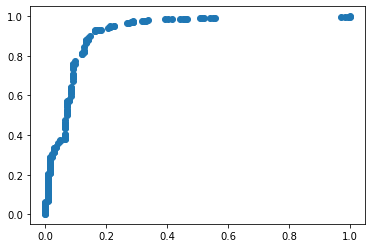

In [142]:
plt.scatter(fprs, tprs)

In [143]:
from sklearn.metrics import auc
auc(fprs, tprs)

0.9197341513292433

#### 5.85

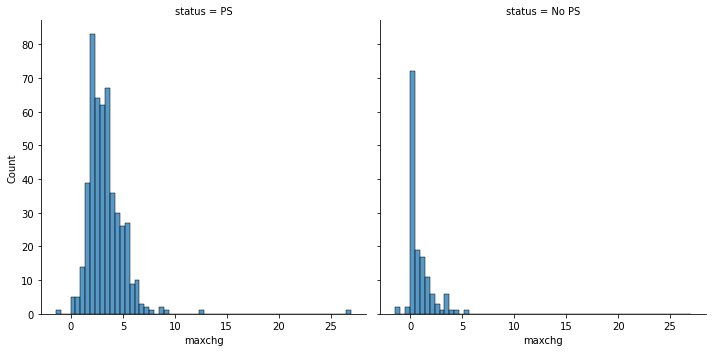

In [144]:
sns.displot(data=df, x='maxchg', col='status')

## Ophthalmology

In [145]:
mean_diff_by_yr = 45
var_diff_by_yr = 1225
thr = 250

#### 5.86

In [146]:
yrs = 5
1-norm.cdf(200, yrs*mean_diff_by_yr, np.sqrt(yrs*var_diff_by_yr))

0.6253029075187146

#### 5.87

In [147]:
yrs = 50-37
1-norm.cdf(900-250, yrs*mean_diff_by_yr, np.sqrt(yrs*var_diff_by_yr))

0.30324899440103825

#### 5.88

In [148]:
mean_diff_by_yr2 = 25

In [149]:
yrs = 50-37
1-norm.cdf(900-250-50, yrs*mean_diff_by_yr2, np.sqrt(yrs*var_diff_by_yr))

0.014659173958577076

## Diabetes 

#### 5.89

In [150]:
mean_compliant = 12
var_compliant = 12

In [151]:
1-norm.cdf(15, mean_compliant, np.sqrt(var_compliant))

0.19323811538561642

#### 5.90

In [152]:
mean_noncompliant = 8
var_noncompliant = 12

In [153]:
1-norm.cdf(15, mean_noncompliant, np.sqrt(var_noncompliant))

0.02165407140539599

#### 5.91

In [154]:
p5Compliant = norm.cdf(5.5, mean_compliant, np.sqrt(var_compliant)) - norm.cdf(4.5, mean_compliant, np.sqrt(var_compliant))
p5Compliant

0.01510957386771429

In [155]:
p5NoCompliant = norm.cdf(5.5, mean_noncompliant, np.sqrt(var_noncompliant)) - norm.cdf(4.5, mean_noncompliant, np.sqrt(var_noncompliant))
p5NoCompliant

0.07908250019128682

In [156]:
priorCompliant = 0.75

p5 = priorCompliant*p5Compliant + (1-priorCompliant)*p5NoCompliant
p5

0.031102805448607423

In [157]:
p5Compliant*priorCompliant/p5

0.36434592434146795

### Environmental Health

## 5.92

In [158]:
25

25

## Ophthalmology

#### 5.95

In [159]:
placebo_mean = 6.4
placebo_std = 3
p_placebo_10 = 1-norm.cdf(10, placebo_mean, placebo_std)
p_placebo_10

0.11506967022170822

#### 5.96

In [160]:
lutein_mean = 21
lutein_std = 8
p_lutein_10 = 1-norm.cdf(10, lutein_mean, lutein_std)
p_lutein_10

0.9154342776486644

#### 5.97

In [161]:
p_lutetin_inc = p_lutein_10*0.01 + (1-p_lutein_10)*0.02
p_lutetin_inc

0.010845657223513355

#### 5.08

In [162]:
p_placebo_inc = p_placebo_10*0.01 + (1-p_placebo_10)*0.02
p_placebo_inc

0.018849303297782918

In [163]:
p_placebo_inc/p_lutetin_inc

1.7379586049352251

## Pediatrics

#### 5.99

In [164]:
p_natural = 4.2/100

In [165]:
n_ivf = 837
n_def_ivf = n_ivf*p_natural
n_def_ivf

35.154

#### 5.100

In [166]:
m = n_def_ivf
v = n_ivf*p_natural*(1-p_natural)
s = np.sqrt(v)
m, s

(35.154, 5.803234615281378)

In [167]:
1-norm.cdf(74, m, s)

1.086852829956797e-11

#### 5.101

In [168]:
p_natural = 9/4000
m = n_def_ivf*p_natural
v = n_ivf*p_natural*(1-p_natural)
s = np.sqrt(v)
1-norm.cdf(5, m, s)

0.0001654147947309781

In [169]:
p_natural

0.00225

## Accident Epidemiology

In [170]:
pAccident = 6.5/100
nTotal = 20
nAccidents = 5

#### 5.102

Binomial

#### 5.103

In [171]:
binom.pmf(nAccidents, nTotal, pAccident)

0.006564243850897415

#### 5.104

In [172]:
nTotal = 50
nAccidents = 11

Binomial

#### 5.105

In [173]:
binom.pmf(nAccidents, nTotal, pAccident)

0.00023770254123047383

#### 5.106

In [174]:
norm.ppf(0.4, 5, np.sqrt(9))

4.2399586905926006

#### 5.107

In [175]:
norm.ppf([0.4, 0.6], 8.2, np.sqrt(9.5)).sum()

16.4

#### 5.108

In [176]:
-norm.ppf(.05)

1.6448536269514729

## Obstetrics

In [177]:
pLowBirth = 5.6/100

#### 5.109

In [178]:
n = 20
k = 2
binom.pmf(k, n, pLowBirth)

0.21116675799544782

#### 5.110

In [179]:
1-binom.cdf(k-1, n, pLowBirth)

0.30947789684066396

#### 5.111

In [180]:
pSmoke = .4
n = 50

In [181]:
pSmoke*(1-pSmoke)*n
# we can use normal approximation to binomial

12.0

In [182]:
1-norm.cdf(24.5, n*pSmoke, np.sqrt(pSmoke*(1-pSmoke)*n))

0.0969654261412054

#### 5.112

In [183]:
cats = [
    (5.7, 40), #% low birth, %smoking
    (19.3, 34),
    (41.6, 25),
    (26.4, 19),
    (7.0, 15),
]
pSmoke = sum((p_lb*p_smoke/10000) for p_lb, p_smoke in cats)
pA = cats[0][0]*cats[0][1]/10000
pLBGivenSmoke = pA/pSmoke
pLBGivenSmoke

0.0900900900900901

## Cancer

#### 5.113

In [184]:
nExpected = 149
nObserved = 107

In [185]:
poisson.pmf(nObserved, nExpected)

5.399806660633709e-05

#### 5.114

In [186]:
incidences = [63.8, 86.6, 92.6, 107, 120.9]

In [187]:
sum(incidences)

470.9

#### 5.115

In [188]:
n = 10000000
c = 0
for inc in incidences:
    dc = n*inc/100000
#     print(n, dc)
    c += dc
    n -= dc
c

47002.31272599745

In [189]:
c/10000000*10**5

470.0231272599745

#### 5.116

## Diabetes

#### 5.117

In [190]:
mActive = 1.9
sActive = 6.7

In [191]:
pLossActive = 1-norm.cdf(1, mActive, sActive)
pLossActive

0.5534285350785028

#### 5.118

In [192]:
mControl = 0
sControl = 6

In [193]:
pLossControl = 1-norm.cdf(1, mControl, sControl)
pLossControl

0.43381616738909634

#### 5.119

In [194]:
pActive = 0.7

In [195]:
pActive*pLossActive/(pActive*pLossActive + (1-pActive)*pLossControl)

0.7485341481790617

## Ophthalmology, Genetics

#### 5.120

In [196]:
pAMD_CC = 121/(121+278)
pAMD_TT = 41/(41+380)
RR = pAMD_CC/pAMD_TT
RR

3.113943395073048

#### 5.121

In [197]:
pC = (278/1185)**0.5
pT = 1 - pC
pTC = 2*pT*pC
pTC

0.4995104285483588

In [198]:
pT,pC

(0.5156456296076772, 0.4843543703923228)

In [199]:
nTC = pTC*1185
nTC

591.9198578298052

#### 5.122

Is lower

## Hypertension

#### 5.123

In [200]:
def get_std(n, k, sigma_a=42.9, sigma=12.8):
    return np.sqrt(sigma_a/n + sigma/(n*k))

In [201]:
n = 2
k = 2
u = 130
s = get_std(n, k)
s, 1-norm.cdf(140, u, s)

(4.964876634922564, 0.021996959996980592)

#### 5.124

In [202]:
k = 2
def get_prob(n, k=2,u = 130, delta=5):
    s = get_std(n, k)
    return norm.cdf(u+delta, u, s) - norm.cdf(u-delta, u, s)

In [203]:
{n: get_prob(n) for n in range(1,10)}

{1: 0.5236027895790056,
 2: 0.686100962373382,
 3: 0.7825768535821571,
 4: 0.8456166906109965,
 5: 0.8886881641717055,
 6: 0.9188939006911683,
 7: 0.9404436301552692,
 8: 0.9560060800060388,
 9: 0.9673472584527398}

Smallest n is 8

#### 5.125

In [204]:
mCaucasian = 120
sCaucasian = 14
mAfrican = 130
sAfrcian = 20
n = 100000

In [205]:
samplesCauc = norm.rvs(mCaucasian, sCaucasian, size=n)
samplesAfrican = norm.rvs(mAfrican, sAfrcian, size=n)
(samplesAfrican > samplesCauc).mean()

0.65827

In [206]:
# african > caucasian -> caucasian - african < 0
mDiff = mCaucasian-mAfrican
sDiff = np.sqrt(sCaucasian**2 + sAfrcian**2)
norm.cdf(0, mDiff, sDiff)

0.6589561564065559

## Ornithology

In [207]:
birds_df = pd.Series([76, 47, 63, 53, 62, 69, 62], index=range(2005, 2012), name='number')
birds_df

2005    76
2006    47
2007    63
2008    53
2009    62
2010    69
2011    62
Name: number, dtype: int64

#### 5.126

In [208]:
birds_df.mean()

61.714285714285715

In [209]:
birds_df.std(ddof=0)

8.875556895433753

#### 5.127

In [210]:
EX = 432/7
EX2 = 27212/7
v = EX2 - EX**2
s = np.sqrt(v)
EX, s

(61.714285714285715, 8.875556895433743)

#### 5.128

In [211]:
1-norm.cdf(59.5, EX, s)

0.5985057584700753

#### 5.129

In [212]:
norm.ppf([.15, .85], EX, s)

array([52.5153622 , 70.91320923])

In [213]:
norm.cdf(53-0.5, EX, s)

0.14959680067379622

In [214]:
norm.cdf(71+0.5, EX, s)

0.8648879250930903

#### 5.130

In [215]:
pLess71 = norm.cdf(71-0.5, EX, s)
1-pLess71

0.16111699322463235